In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib-2.0.0b1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
features = pd.read_csv('data/PaticlulateComposite.csv', names=['var1', 'var2', 'var3', 'var4'])

target = pd.read_csv('data/StressData.dat', names=['stress'])

In [4]:
features.head()

,var1,var2,var3,var4
0,4.280000e+09,0.404,7.490000e+11,0.336
1,5.790000e+09,0.409,1.630000e+11,0.296
2,7.400000e+09,0.405,1.520000e+11,0.345
3,8.840000e+09,0.423,6.100000e+11,0.333
4,3.960000e+09,0.400,2.620000e+11,0.338


In [5]:
target.head()

,stress
0,9.413100e+08
1,1.311500e+09
2,1.617000e+09
3,2.289700e+09
4,8.487300e+08


(array([ 1.,  2.,  1.,  1.,  0.,  1.,  1.,  1.,  3.,  4.,  0.,  1.,  2.,
         1.,  2.,  3.,  1.,  3.,  2.,  4.,  2.,  3.,  1.,  3.,  2.,  1.,
         7.,  2.,  1.,  3.,  1.,  0.,  2.,  1.,  0.,  4.,  2.,  3.,  1.,
         2.,  4.,  0.,  2.,  2.,  1.,  4.,  1.,  2.,  5.,  4.]),
 array([  1.15000000e+09,   1.32620000e+09,   1.50240000e+09,
          1.67860000e+09,   1.85480000e+09,   2.03100000e+09,
          2.20720000e+09,   2.38340000e+09,   2.55960000e+09,
          2.73580000e+09,   2.91200000e+09,   3.08820000e+09,
          3.26440000e+09,   3.44060000e+09,   3.61680000e+09,
          3.79300000e+09,   3.96920000e+09,   4.14540000e+09,
          4.32160000e+09,   4.49780000e+09,   4.67400000e+09,
          4.85020000e+09,   5.02640000e+09,   5.20260000e+09,
          5.37880000e+09,   5.55500000e+09,   5.73120000e+09,
          5.90740000e+09,   6.08360000e+09,   6.25980000e+09,
          6.43600000e+09,   6.61220000e+09,   6.78840000e+09,
          6.96460000e+09,   7.1408

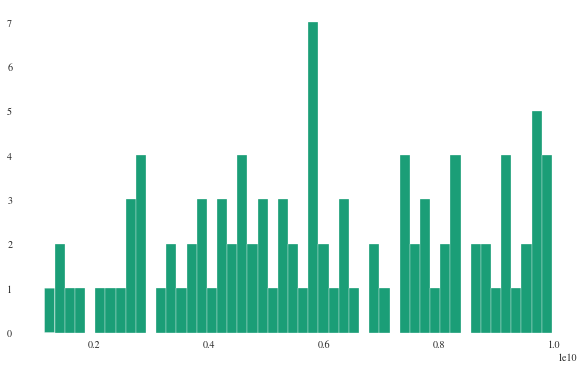

In [6]:
plt.hist(features['var1'], bins=50)

(array([ 3.,  1.,  7.,  1.,  0.,  2.,  4.,  4.,  2.,  3.,  0.,  2.,  2.,
         1.,  0.,  0.,  1.,  4.,  0.,  3.,  0.,  1.,  8.,  2.,  1.,  0.,
         0.,  2.,  0.,  3.,  2.,  4.,  3.,  0.,  1.,  1.,  2.,  5.,  0.,
         1.,  2.,  1.,  6.,  0.,  3.,  3.,  2.,  4.,  0.,  3.]),
 array([ 0.4  ,  0.401,  0.402,  0.403,  0.404,  0.405,  0.406,  0.407,
         0.408,  0.409,  0.41 ,  0.411,  0.412,  0.413,  0.414,  0.415,
         0.416,  0.417,  0.418,  0.419,  0.42 ,  0.421,  0.422,  0.423,
         0.424,  0.425,  0.426,  0.427,  0.428,  0.429,  0.43 ,  0.431,
         0.432,  0.433,  0.434,  0.435,  0.436,  0.437,  0.438,  0.439,
         0.44 ,  0.441,  0.442,  0.443,  0.444,  0.445,  0.446,  0.447,
         0.448,  0.449,  0.45 ]),
 <a list of 50 Patch objects>)

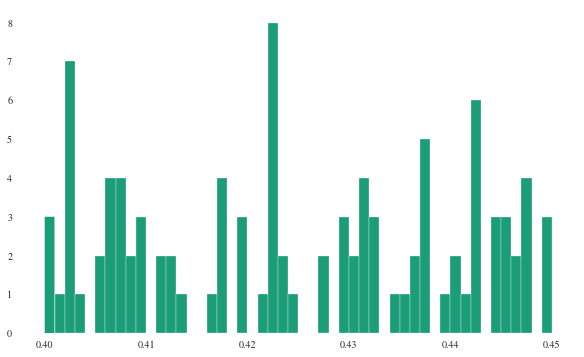

In [7]:
plt.hist(features['var2'], bins=50)

(array([ 3.,  1.,  7.,  1.,  0.,  2.,  4.,  4.,  2.,  3.,  0.,  2.,  2.,
         1.,  0.,  0.,  1.,  4.,  0.,  3.,  0.,  1.,  8.,  2.,  1.,  0.,
         0.,  2.,  0.,  3.,  2.,  4.,  3.,  0.,  1.,  1.,  2.,  5.,  0.,
         1.,  2.,  1.,  6.,  0.,  3.,  3.,  2.,  4.,  0.,  3.]),
 array([ 0.4  ,  0.401,  0.402,  0.403,  0.404,  0.405,  0.406,  0.407,
         0.408,  0.409,  0.41 ,  0.411,  0.412,  0.413,  0.414,  0.415,
         0.416,  0.417,  0.418,  0.419,  0.42 ,  0.421,  0.422,  0.423,
         0.424,  0.425,  0.426,  0.427,  0.428,  0.429,  0.43 ,  0.431,
         0.432,  0.433,  0.434,  0.435,  0.436,  0.437,  0.438,  0.439,
         0.44 ,  0.441,  0.442,  0.443,  0.444,  0.445,  0.446,  0.447,
         0.448,  0.449,  0.45 ]),
 <a list of 50 Patch objects>)

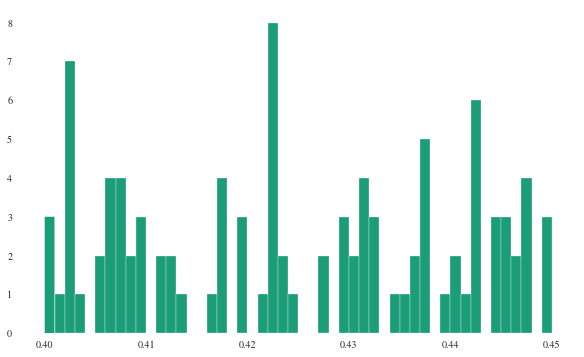

In [8]:
plt.hist(features['var2'], bins=50)

(array([ 2.,  1.,  3.,  0.,  2.,  0.,  2.,  2.,  3.,  1.,  3.,  5.,  2.,
         1.,  2.,  1.,  6.,  4.,  1.,  3.,  4.,  1.,  1.,  0.,  0.,  1.,
         3.,  5.,  0.,  1.,  4.,  1.,  0.,  0.,  3.,  0.,  1.,  8.,  1.,
         2.,  1.,  6.,  1.,  0.,  2.,  0.,  3.,  2.,  1.,  4.]),
 array([  1.03000000e+10,   3.00740000e+10,   4.98480000e+10,
          6.96220000e+10,   8.93960000e+10,   1.09170000e+11,
          1.28944000e+11,   1.48718000e+11,   1.68492000e+11,
          1.88266000e+11,   2.08040000e+11,   2.27814000e+11,
          2.47588000e+11,   2.67362000e+11,   2.87136000e+11,
          3.06910000e+11,   3.26684000e+11,   3.46458000e+11,
          3.66232000e+11,   3.86006000e+11,   4.05780000e+11,
          4.25554000e+11,   4.45328000e+11,   4.65102000e+11,
          4.84876000e+11,   5.04650000e+11,   5.24424000e+11,
          5.44198000e+11,   5.63972000e+11,   5.83746000e+11,
          6.03520000e+11,   6.23294000e+11,   6.43068000e+11,
          6.62842000e+11,   6.8261

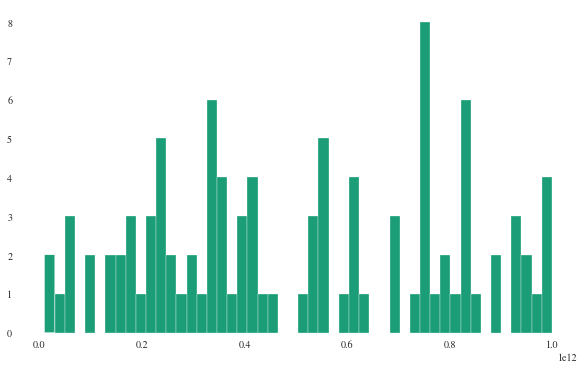

In [9]:
plt.hist(features['var3'], bins=50)

(array([ 2.,  0.,  2.,  1.,  1.,  1.,  1.,  0.,  3.,  0.,  2.,  4.,  1.,
         2.,  1.,  1.,  2.,  1.,  1.,  5.,  2.,  2.,  1.,  2.,  1.,  2.,
         1.,  5.,  2.,  1.,  5.,  2.,  3.,  1.,  3.,  1.,  2.,  2.,  2.,
         3.,  0.,  7.,  2.,  0.,  4.,  0.,  2.,  4.,  2.,  5.]),
 array([ 0.282  ,  0.28336,  0.28472,  0.28608,  0.28744,  0.2888 ,
         0.29016,  0.29152,  0.29288,  0.29424,  0.2956 ,  0.29696,
         0.29832,  0.29968,  0.30104,  0.3024 ,  0.30376,  0.30512,
         0.30648,  0.30784,  0.3092 ,  0.31056,  0.31192,  0.31328,
         0.31464,  0.316  ,  0.31736,  0.31872,  0.32008,  0.32144,
         0.3228 ,  0.32416,  0.32552,  0.32688,  0.32824,  0.3296 ,
         0.33096,  0.33232,  0.33368,  0.33504,  0.3364 ,  0.33776,
         0.33912,  0.34048,  0.34184,  0.3432 ,  0.34456,  0.34592,
         0.34728,  0.34864,  0.35   ]),
 <a list of 50 Patch objects>)

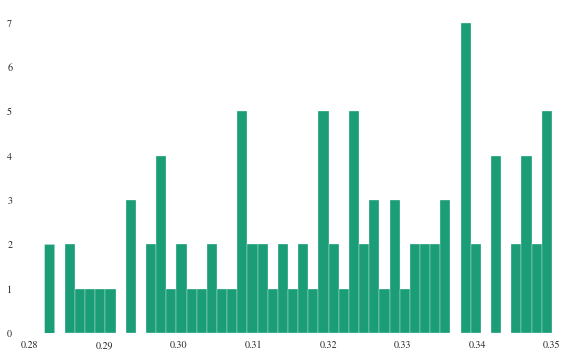

In [10]:
plt.hist(features['var4'], bins=50)

(array([ 1.,  1.,  1.,  0.,  3.,  0.,  3.,  3.,  3.,  2.,  2.,  2.,  3.,
         2.,  2.,  5.,  2.,  4.,  4.,  2.,  1.,  4.,  0.,  5.,  2.,  3.,
         0.,  2.,  2.,  2.,  5.,  2.,  2.,  3.,  4.,  2.,  4.,  2.,  1.,
         0.,  3.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([  2.50860000e+08,   3.10146800e+08,   3.69433600e+08,
          4.28720400e+08,   4.88007200e+08,   5.47294000e+08,
          6.06580800e+08,   6.65867600e+08,   7.25154400e+08,
          7.84441200e+08,   8.43728000e+08,   9.03014800e+08,
          9.62301600e+08,   1.02158840e+09,   1.08087520e+09,
          1.14016200e+09,   1.19944880e+09,   1.25873560e+09,
          1.31802240e+09,   1.37730920e+09,   1.43659600e+09,
          1.49588280e+09,   1.55516960e+09,   1.61445640e+09,
          1.67374320e+09,   1.73303000e+09,   1.79231680e+09,
          1.85160360e+09,   1.91089040e+09,   1.97017720e+09,
          2.02946400e+09,   2.08875080e+09,   2.14803760e+09,
          2.20732440e+09,   2.2666

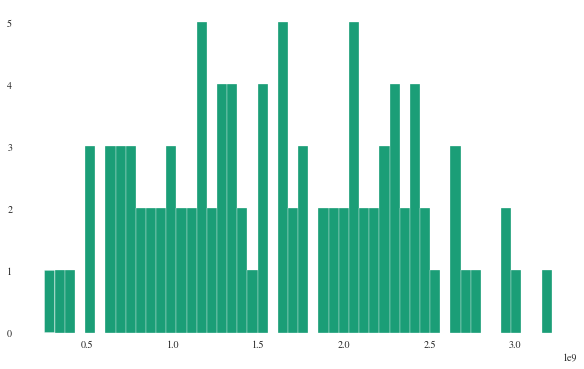

In [11]:
plt.hist(target.values.ravel(), bins=50)

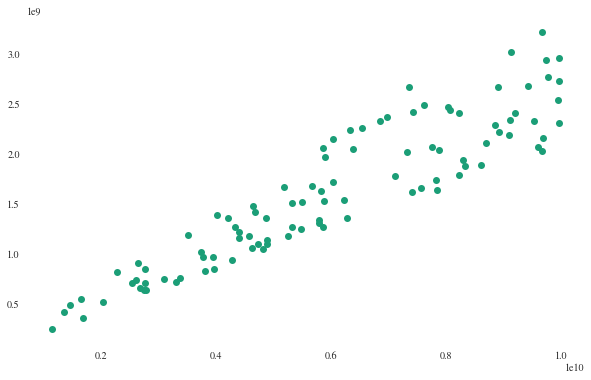

In [12]:
plt.scatter(features['var1'], target)

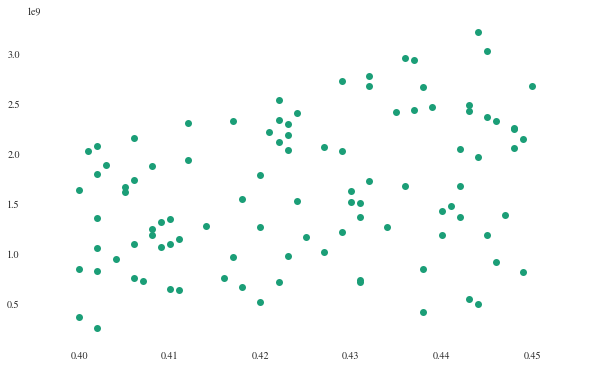

In [13]:
plt.scatter(features['var2'], target)

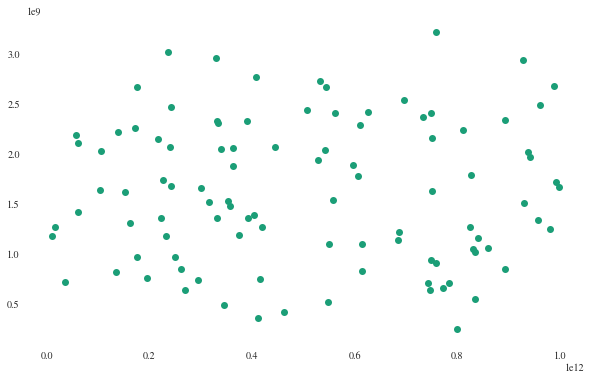

In [14]:
plt.scatter(features['var3'], target)

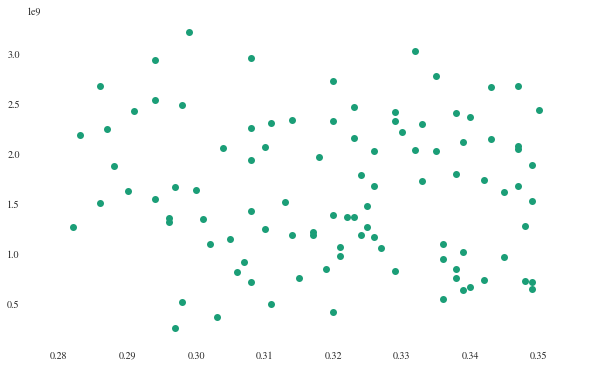

In [15]:
plt.scatter(features['var4'], target)

In [16]:
features.describe()

,var1,var2,var3,var4
count,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,5.994800e+09,0.424760,5.063630e+11,0.320730
std,2.485977e+09,0.015517,2.845020e+11,0.018991
min,1.150000e+09,0.400000,1.030000e+10,0.282000
25%,4.160000e+09,0.410000,2.590000e+11,0.306750
50%,5.860000e+09,0.424000,4.845000e+11,0.322500
75%,8.097500e+09,0.438250,7.527500e+11,0.338000
max,9.960000e+09,0.450000,9.990000e+11,0.350000


In [17]:
target.describe()

,stress
count,1.000000e+02
mean,1.615066e+09
std,7.099538e+08
min,2.508600e+08
25%,1.059175e+09
50%,1.579300e+09
75%,2.193200e+09
max,3.215200e+09


In [18]:
features.corr()

,var1,var2,var3,var4
var1,1.000000,-0.020198,-0.051204,-0.031631
var2,-0.020198,1.000000,0.035796,-0.110763
var3,-0.051204,0.035796,1.000000,-0.057967
var4,-0.031631,-0.110763,-0.057967,1.000000


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

In [20]:
lm = LinearRegression()
print np.mean(cross_val_score(lm, features, target, cv=10, scoring='r2'))

0.963706481572


In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor()
print np.mean(cross_val_score(rf, features, target.values.ravel(), cv=10, scoring='r2'))

0.945575848094


In [23]:
model = rf.fit(features, target.values.ravel())

In [24]:
predicted = rf.predict(features)

In [25]:
model.feature_importances_

array([ 0.87284559,  0.11031462,  0.00778256,  0.00905723])